In [26]:
import numpy as np
import matplotlib.pyplot as plt
import AvAClassifier as cl
import getData as gd

In [27]:
# case for 2 features and 2, 3, 4 classes
n_features : float = 2

# number of classes
n_classes : float = 4

# for each class
n_objects : float = 2000

# spaseing between any 2 classes (for each feature)
spasing : float = 10

# scale for define maximum deviation from the center 
scale : float = 1.0

# start position for 1 class (2 features)
start_pos : tuple[float, float] = np.random.randint(-5,0), np.random.randint(-5,0)



x, y = gd.gen_dataset(n_objects, start_pos, n_classes, spasing, scale)

In [28]:
# number of iterations
iteration = 2000

# based on Perceptron
l1 = cl.AvAClassifier(n_features, n_classes, 0)
# based on SVM
l2 = cl.AvAClassifier(n_features, n_classes, 1)
# based on Logistic
l3 = cl.AvAClassifier(n_features, n_classes, 2)

# training 
l1.train(x, y, iteration)
l2.train(x, y, iteration)
l3.train(x, y, iteration)

# get weights after training
w1 = l1.weights
w2 = l2.weights
w3 = l3.weights

In [29]:
# calc accuracy as (correct predictions) / (total predictions)

# padding x
x_test = np.concat([np.ones((1, x.shape[1])), x], 0)

y_pred = np.zeros((y.shape[0], 3))
y_pred[:, 0] = y == l1.predict(x_test, n_classes)
y_pred[:, 1] = y == l2.predict(x_test, n_classes)
y_pred[:, 2] = y == l3.predict(x_test, n_classes)

correct_predictions = np.sum(y_pred, 0)
accuracy = correct_predictions / y.shape[0]

print("Accuracy Linear:", accuracy[0])
print("Accuracy SVM:", accuracy[1])
print("Accuracy Logistic:", accuracy[2])

Accuracy Linear: 1.0
Accuracy SVM: 1.0
Accuracy Logistic: 1.0


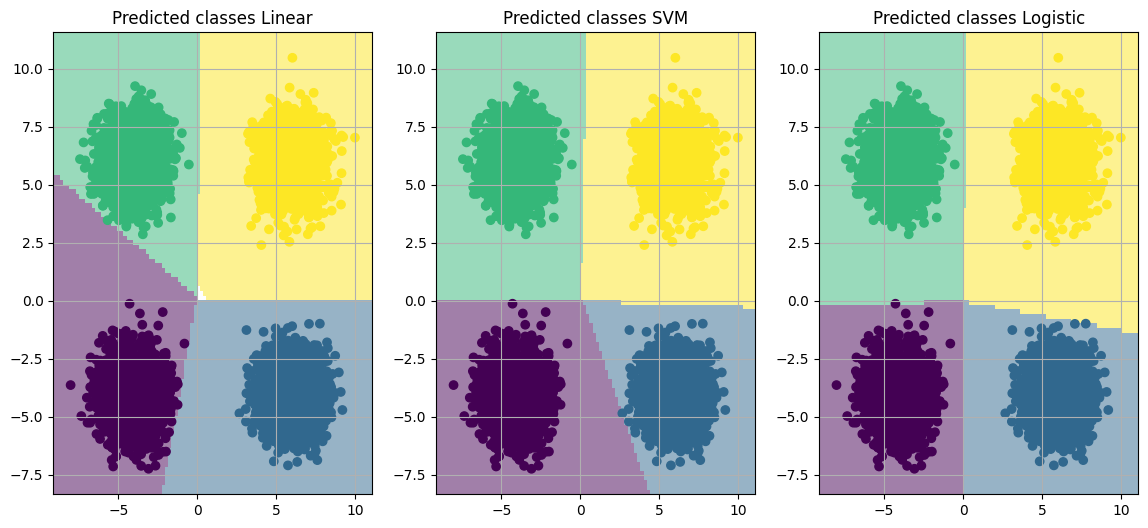

In [30]:
# find predicts after train

x_min, x_max = x[0, :].min() - 1, x[0, :].max() + 1
y_min, y_max = x[1, :].min() - 1, x[1, :].max() + 1
x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100), \
                     np.linspace(y_min, y_max, 100))


x1_in = x1.reshape(1, -1)
x2_in = x2.reshape(1, -1)


a = np.concat([np.ones(x1_in.shape), x1_in, x2_in], 0)

res = l1.predict(a, n_classes)
res = res.reshape(x1.shape)

res2 = l2.predict(a, n_classes)
res2 = res2.reshape(x1.shape)

res3 = l3.predict(a, n_classes)
res3 = res3.reshape(x1.shape)


plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.pcolormesh(x1,x2,res, alpha = 0.5)
plt.scatter(x[0, :], x[1, :], c=y)
plt.title("Predicted classes Linear")
plt.grid(1)
plt.subplot(1, 3, 2)
plt.pcolormesh(x1,x2,res2, alpha = 0.5)
plt.scatter(x[0, :], x[1, :], c=y)
plt.title("Predicted classes SVM")
plt.grid(1)
plt.subplot(1, 3, 3)
plt.pcolormesh(x1,x2,res3, alpha = 0.5)
plt.scatter(x[0, :], x[1, :], c=y)
plt.title("Predicted classes Logistic")
plt.grid(1)